# Part I - Ford Go Bike
## by Habeeb Zakariya

## Introduction
> The information for Ford's GoBike programme, which was kindly provided to us by Ford, will be the subject of our study. Since there aren't many quantitative fields in this dataset, I'll try to make the most of what there is.

### Dataset Overview
The dataset(s) provided to us by Ford contain the following fields:
<ul style=“list-style-type:square”>
    
<li>Trip Duration (in seconds)</li>
<li>Start Time and Date</li>
<li>End Time and Date</li>
<li>Start Station ID</li>
<li>Start Station Name</li>
<li>Start Station Latitude</li>
<li>Start Station Longitude</li>
<li>End Station ID</li>
<li>End Station Name</li>
<li>End Station Latitude</li>
<li>End Station Longitude</li>
<li>Bike ID</li>
<li>User Type (Subscriber or Customer - "Subscriber" = Member or "Customer" = Casual)</li>
<li>Member Year of Birth</li>
<li>Member Gender</li>
</ul>

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_fgb= pd.read_csv('201902-fordgobike-tripdata.csv')
df_fgb.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


***check data type of each column.***

In [3]:
df_fgb.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

***check dimensionality of the DataFrame.***

In [4]:
df_fgb.shape

(183412, 16)

***check summary of a DataFrame.***

In [5]:
df_fgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


***check Null values in the DataFrame***

In [6]:
df_fgb.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

***Check for duplicates in the dataset***

In [7]:
df_fgb.duplicated().sum()

0

the following columns contain null values

_start_station_id- __197 valuses__

_start_station_name- __197 values__

_member_birth_year- __8265 values__

_member_gender- __8265 values__

## Create copy of dataset

In [8]:
df_fgb_copy=df_fgb.copy()

***Remove rows with Null value*** 

In [9]:
df_fgb_copy.drop(df_fgb_copy[df_fgb_copy.isnull().any(axis=1)].index, inplace=True)

***Check if Null values are removed***

In [10]:
df_fgb_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

***Drop columns 'end_station_id' & 'end_station_name'***

In [11]:
df_fgb.dropna(subset=['end_station_id','end_station_name'], inplace=True)

***change data types on columns (start_time,end_time,start_station_id,end_station_id,bike_id,member_birth_year) to the correct types***

In [12]:
df_fgb_copy['start_time'] = pd.to_datetime(df_fgb_copy['start_time'])
df_fgb_copy['end_time'] = pd.to_datetime(df_fgb_copy['end_time'])
df_fgb_copy['start_station_id'] = df_fgb_copy['start_station_id'].astype(str)
df_fgb_copy['end_station_id'] = df_fgb_copy['end_station_id'].astype(str)
df_fgb_copy['bike_id'] = df_fgb_copy['bike_id'].astype(str)
df_fgb_copy['member_birth_year'] = df_fgb_copy['member_birth_year'].astype(int)
df_fgb_copy.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [13]:
df_fgb_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


***Split start_time column to 'year','month','time' to aid time analysis***

In [14]:
df_fgb_copy["year"] = df_fgb_copy["start_time"].dt.year
df_fgb_copy["month"] = df_fgb_copy["start_time"].dt.month_name()
df_fgb_copy["day"] = df_fgb_copy["start_time"].dt.strftime("%a")

In [15]:
df_fgb_copy['start_time_hour'] = df_fgb_copy['start_time'].dt.hour
df_fgb_copy['end_time_hour'] = df_fgb_copy['end_time'].dt.hour

In [16]:
df_fgb_copy[['start_time_hour','end_time_hour']].head(5)

,start_time_hour,end_time_hour
0,17,8
2,12,5
3,17,4
4,23,0
5,23,0


In [17]:
df_fgb_copy[['year','month','day']].head()

,year,month,day
0,2019,February,Thu
2,2019,February,Thu
3,2019,February,Thu
4,2019,February,Thu
5,2019,February,Thu


***Create age groups from the 'member_birth_year' column***

*determine the min and max birth year from 'member_birth_year' column*

In [18]:
print(df_fgb_copy['member_birth_year'].min())
print(df_fgb_copy['member_birth_year'].max())

1878
2001


In [19]:
# set year range in bin
bins= [1878,1901,1928,1946,1965,1981,1997,2010]
# set age range labels
labels = ['lost gen','great gen','silent gen','baby boomers','gen x','millennials','gen z']
df_fgb_copy['age_group'] = pd.cut(df_fgb_copy['member_birth_year'], bins=bins, labels=labels, right=False)

In [20]:
# count of unique values of age range
df_fgb_copy['age_group'].value_counts().head()

millennials     118411
gen x            36568
gen z            10897
baby boomers      8706
silent gen         294
Name: age_group, dtype: int64

**Get the age of the riders** 

In [21]:
# subtracting the current year from the 'member_birth_year'
df_fgb_copy['age'] = 2022 - df_fgb_copy['member_birth_year']
# setting the 'age' column as data type int
df_fgb_copy['age'] = df_fgb_copy['age'].astype(int)

#printing unique value counts of age in the dataset
print(df_fgb_copy['age'].value_counts().head())

34    10214
29     9323
33     8967
32     8640
31     8484
Name: age, dtype: int64


In [22]:
# counting the top 10 unique values of 'start_station_name'
df_fgb_copy['start_station_name'].value_counts().head(10)

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2577
San Francisco Ferry Building (Harry Bridges Plaza)           2541
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

In [23]:
# counting the bottom 10 unique values of 'start_station_name'
df_fgb_copy['start_station_name'].value_counts().tail(10)

Backesto Park (Jackson St at 13th St)    17
23rd Ave at Foothill Blvd                17
Leavenworth St at Broadway               16
Taylor St at 9th St                      13
Farnam St at Fruitvale Ave                9
Willow St at Vine St                      9
Parker Ave at McAllister St               7
21st Ave at International Blvd            4
Palm St at Willow St                      3
16th St Depot                             2
Name: start_station_name, dtype: int64

In [24]:
# counting the top 10 unique values of 'end_station_name'
df_fgb_copy['end_station_name'].value_counts().head(10)

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Powell St BART Station (Market St at 4th St)                 2854
Berry St at 4th St                                           2782
The Embarcadero at Sansome St                                2341
Steuart St at Market St                                      2264
Powell St BART Station (Market St at 5th St)                 2153
Name: end_station_name, dtype: int64

In [25]:
# counting the bottom 10 unique values of 'end_station_name'
df_fgb_copy['end_station_name'].value_counts().tail(10)

Backesto Park (Jackson St at 13th St)    18
Foothill Blvd at Harrington Ave          16
Leavenworth St at Broadway               12
Taylor St at 9th St                      11
Farnam St at Fruitvale Ave               10
Parker Ave at McAllister St               9
Palm St at Willow St                      7
16th St Depot                             6
21st Ave at International Blvd            5
Willow St at Vine St                      5
Name: end_station_name, dtype: int64

In [26]:
# counting the top 10 unique values of 'member_birth_year'
df_fgb_copy['member_birth_year'].value_counts().head(10)

1988    10214
1993     9323
1989     8967
1990     8640
1991     8484
1992     8245
1987     8010
1986     7953
1994     7654
1995     7420
Name: member_birth_year, dtype: int64

In [27]:
# counting the bottom 10 unique values of 'member_birth_year'
df_fgb_copy['member_birth_year'].value_counts().tail(10)

1901    6
1938    3
1920    3
1934    2
1944    2
1878    1
1930    1
1928    1
1927    1
1910    1
Name: member_birth_year, dtype: int64

In [28]:
# counting the unique values of 'member_gender'
df_fgb_copy['member_gender'].value_counts().head()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

### Exploratory Analysis

#### Descriptive Statistics

In [29]:
#descriptive analysis of the dataset
df_fgb_copy.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,year,start_time_hour,end_time_hour,age
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952.000000,174952.000000
mean,704.002744,37.771220,-122.351760,37.771414,-122.351335,1984.803135,2019.0,13.456165,13.609533,37.196865
std,1642.204905,0.100391,0.117732,0.100295,0.117294,10.118731,0.0,4.734282,4.748029,10.118731
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1878.000000,2019.0,0.000000,0.000000,21.000000
25%,323.000000,37.770407,-122.411901,37.770407,-122.411647,1980.000000,2019.0,9.000000,9.000000,30.000000
50%,510.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,2019.0,14.000000,14.000000,35.000000
75%,789.000000,37.797320,-122.283093,37.797673,-122.286533,1992.000000,2019.0,17.000000,18.000000,42.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,2019.0,23.000000,23.000000,144.000000


In [30]:
# displaying the top 5 rows of the dataset
df_fgb_copy.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,year,month,day,start_time_hour,end_time_hour,age_group,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984,Male,No,2019,February,Thu,17,8,millennials,38
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972,Male,No,2019,February,Thu,12,5,gen x,50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989,Other,No,2019,February,Thu,17,4,millennials,33
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974,Male,Yes,2019,February,Thu,23,0,gen x,48
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959,Male,No,2019,February,Thu,23,0,baby boomers,63


***Histogram***

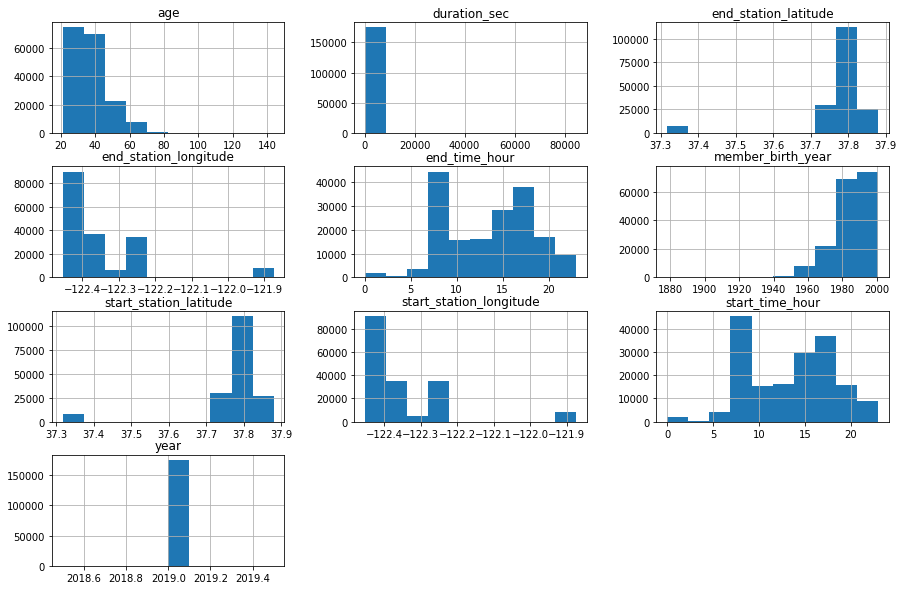

In [31]:
#histogram of all the variable in the dataset
df_fgb_copy.hist(figsize=(15,10));

In [32]:
df_fgb_copy.skew()

duration_sec               28.476854
start_station_id            0.670354
start_station_latitude     -3.635155
start_station_longitude     2.757180
end_station_id              0.686262
end_station_latitude       -3.650248
end_station_longitude       2.781762
bike_id                    -1.084115
member_birth_year          -1.342315
year                        0.000000
start_time_hour            -0.150892
end_time_hour              -0.176799
age                         1.342315
dtype: float64

### What is the structure of your dataset?

> The dataset contains 183412 fordgobike journeys with the following 16 specifications: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, bike_id, user_type, member_birth_year, member_gender, and bike_share for all trip. Nine of the 16 specifications are numerical, two are date/time, four are object types, and one is boolean.

### What is/are the main feature(s) of interest in your dataset?

> Finding out which days of the week have the most bike rides is what interests me the most. I'd also like to know whether there is a correlation between the length of a ride and the rider's gender or age.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> examining every feature in the dataset. This is the reason I removed all NULL values, keeping only the ones I believe to be crucial for further analysis.

In [33]:
## function to cut down on lines of code and tidy up the task
def label(x,y,t):
    #setting the x and y axis 
    plt.xlabel(x)
    plt.ylabel(y)
    # setting the chat title and displaying the chat
    plt.title(t)
    plt.show()

## Univariate Exploration

> ***This section examines the distributions of the dataset's various variables, such as the age-group distribution, gender, user type, etc.***



**what is the age-group distrubution of riders?**

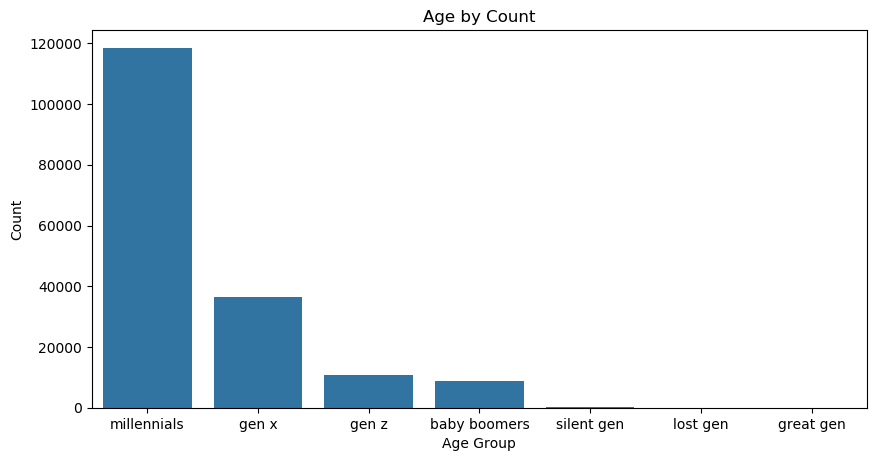

In [34]:
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
#setting the base color
base_color=sb.color_palette()[0]
# setting the age group index by counting the unique values of the 'age_group'
gen_index= df_fgb_copy['age_group'].value_counts().index
#plot bar chat of 'age_group'
sb.countplot(data=df_fgb_copy,x="age_group",color= base_color,order=gen_index)
label("Age Group","Count","Age by Count")

*Of all the age groups, millennials are the most numerous.*

**what is the gender distrubution amongst the riders?**

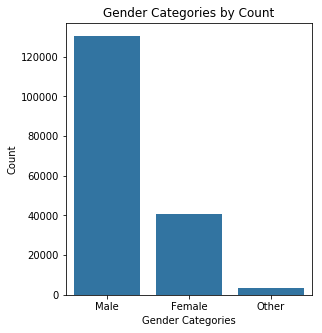

In [35]:
#setting the chat size
plt.figure(figsize=(15,5))
# Add an Axes to the current figure 
plt.subplot(1,3,1)
base_color=sb.color_palette()[0]
# setting the age group index by counting the unique values of the 'member_gender'
gen_index= df_fgb_copy['member_gender'].value_counts().index
#plot bar chat of genders
sb.countplot(data=df_fgb_copy, x="member_gender", color= base_color, order=gen_index)
label("Gender Categories","Count","Gender Categories by Count") 

*The above chat shows that men are the most common gender to utilize the bicycles sevice.*


**what the distrubution on user types amongst the riders**

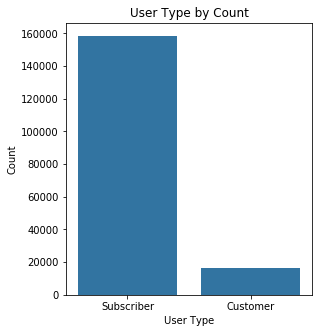

In [36]:
#setting the chat size
plt.figure(figsize=[15,5])
# Add an Axes to the current figure 
plt.subplot(1,3,2)
base_color=sb.color_palette()[0]
# setting the age group index by counting the unique values of the 'user_type'
gen_index= df_fgb_copy['user_type'].value_counts().index
#plot bar chat of user types
sb.countplot(data=df_fgb_copy,x="user_type",color= base_color,order=gen_index)
label("User Type","Count","User Type by Count")

*The above chat shows that there are more subscribers than customers.*


**what's the distrubution of shared bike trips?**

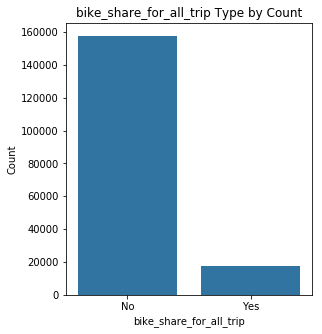

In [37]:
#setting the chat size
plt.figure(figsize=[15,5])
# Add an Axes to the current figure 
plt.subplot(1,3,3)
base_color=sb.color_palette()[0]
# setting the age group index by counting the unique values of the 'bike_share_for_all_trip'
gen_index= df_fgb_copy['bike_share_for_all_trip'].value_counts().index
# plot bar chat of bike_share_for_all_trip
sb.countplot(data=df_fgb_copy,x="bike_share_for_all_trip",color= base_color,order=gen_index)
label("bike_share_for_all_trip","Count","bike_share_for_all_trip Type by Count")  ;

*The above chat shows that when riding, a lot of people didn't share the bike.*

**what is the most common duration(sec) of bike trips**

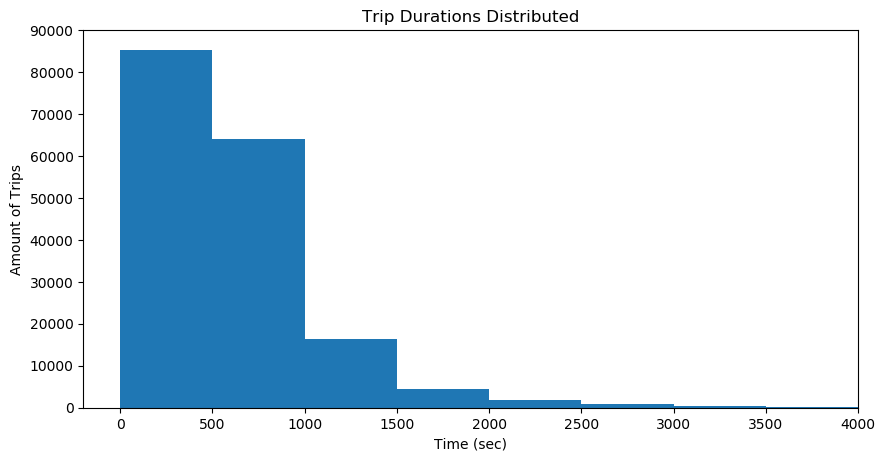

In [38]:
#set bin size
binsize = 500
bins = np.arange(0, df_fgb_copy['duration_sec'].max()+binsize, binsize)
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
# plot histogram of trip duration
plt.hist(data = df_fgb_copy, x = 'duration_sec', bins = bins)
plt.axis([-200, 4000, 0, 90000])
label("Time (sec)","Amount of Trips","Trip Durations Distributed")

*The distribution is skewed to the left showing that most frequent trips are less than or equal to 1000 .*

**what is the most common duration(min) of bike trips ?**

In [39]:
## converting duration(sec) to min
df_fgb_copy['duration_min'] = df_fgb_copy['duration_sec'] / 60

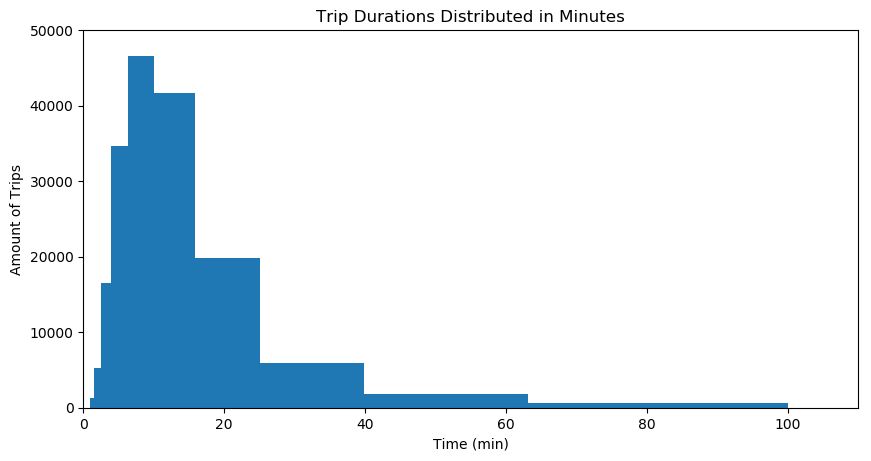

In [40]:
# set bin size
bins = 10 ** np.arange(0, 2+0.1, 0.2)
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
# plot histogram of trip duration in mins
plt.hist(data = df_fgb_copy, x = 'duration_min', bins = bins)
plt.axis([0, 110, 0, 50000])
label("Time (min)","Amount of Trips","Trip Durations Distributed in Minutes")

*The distribution is skewed to the left showing that most frequent trips were short and around 25mins.*

**what is the distribution of bike rides per day?**

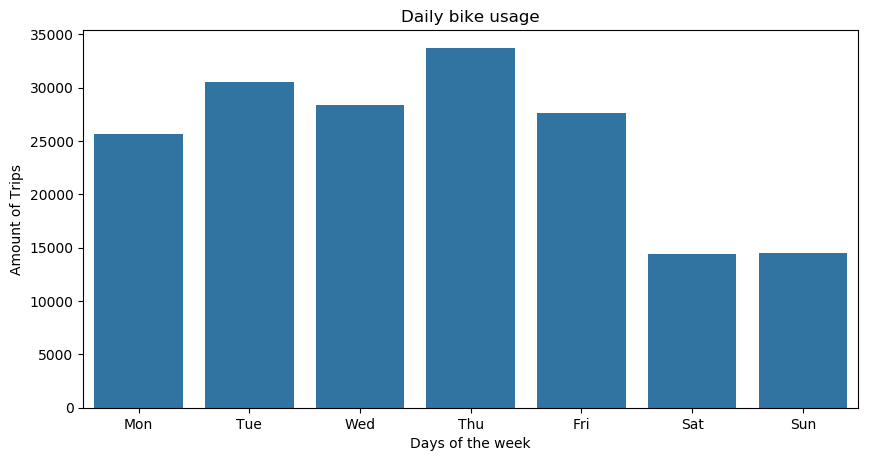

In [41]:
# creating categories(days) 
df_fgb_copy['day'] = pd.Categorical(df_fgb_copy['day'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
    ordered=True)
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
base_color=sb.color_palette()[0]
# ploting bar chat of daily bike rides
sb.countplot(data=df_fgb_copy,x="day",color= base_color)
label("Days of the week","Amount of Trips","Daily bike usage");

 *Thursdays and Tuesdays are the days when most people ride bikes, while Saturdays and Sundays see the lowest usage.*

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The majority of ride-sharing customers are millennials and members of generation X, according to the various plots. Little of the older generations—the magnificent, silent, and lost—is represented. Less than half of users are female, with most users being men. There are a very small number of people whose gender is unknown. Customers make up a very small fraction of the user base, but users who belong to the subscription group make up a sizable portion. There didn't seem to be any weird points, thus there was no need for transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When first plotting the original data, the distribution of the trip duration caught me off guard. Nothing appears to be unusual.

## Bivariate Exploration

> In this section, investigation of the relationships between pairs of variables in the
dataset will be acrried out, such as gender and user type etc

**what is the relationship between member Gender and user type?**

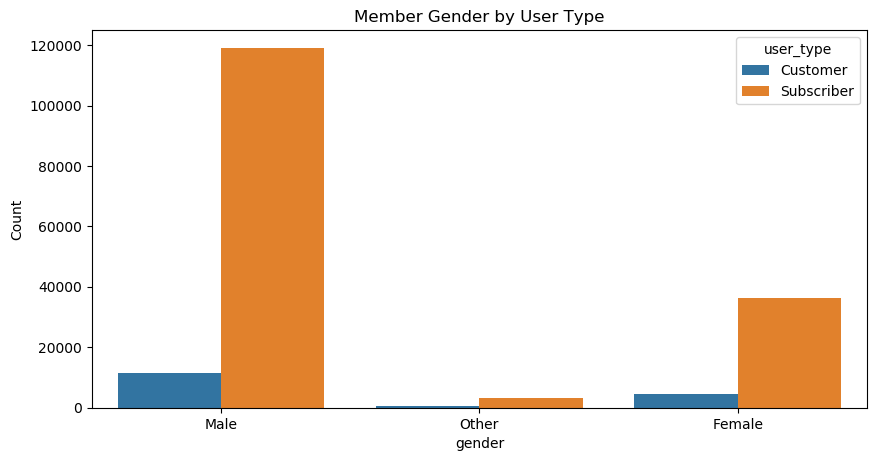

In [42]:
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
# plotting member gender by user type
Bivariate = sb.countplot(x="member_gender", hue="user_type",data=df_fgb_copy)
label("gender","Count","Member Gender by User Type");

**is there any relationship between Age and ride duration in minutes?**

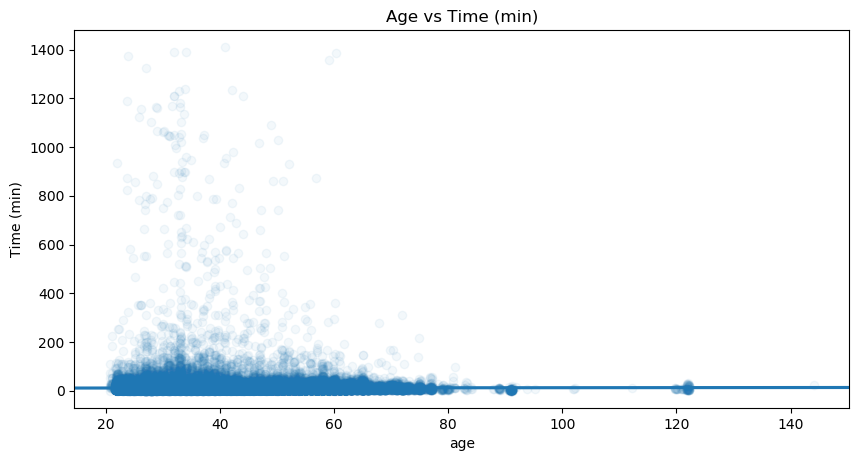

In [43]:
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
# plotting scattered plots of age vs time
sb.regplot(x=df_fgb_copy["age"], y=df_fgb_copy["duration_min"],x_jitter = 0.3, scatter_kws={'alpha':1/20})
label("age","Time (min)","Age vs Time (min)");

*the chat above shows there is no correlation between age of riders and time(duration of rides)*

**the relationship between user type and bike ride duration ?**

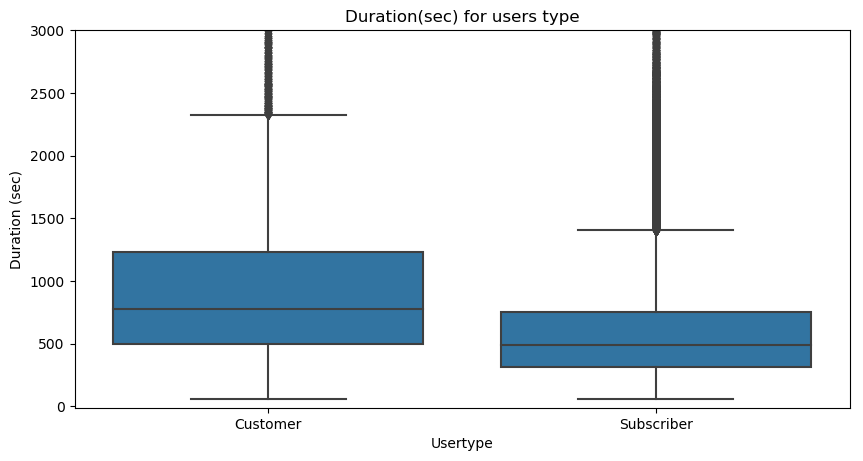

In [44]:
#setting the chat size
plt.figure(figsize = (10,5), dpi = 100)
base_color = sb.color_palette()[0]
#plot box plot for duration vs user type
sb.boxplot(data = df_fgb_copy, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
label("Usertype","Duration (sec)","Duration(sec) for users type");

*the median(Q2) bike ride duration for customers is around 700secs and for subscriber its around 500secs*

**Exactly how do age and gender relate to one another ?**

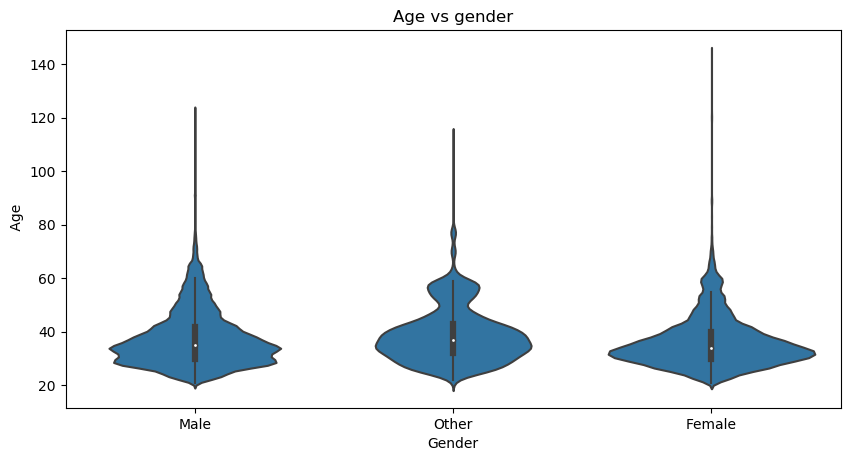

In [45]:
# set chat size and color
plt.figure(figsize = (10,5), dpi = 100)
base_color = sb.color_palette()[0]
#plot violin plot of age vs gender
sb.violinplot(data=df_fgb_copy, x='member_gender', y='age', color=base_color, innner=None);
label("Gender"," Age","Age vs gender")

*the age is evenly spread out across genders between 20 to 40 years, with the female category have a more smeared out distrubution*

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers cycle farther than subscribers do. although subscribers are more numerous than clients

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Compared to men, women are more evenly distributed according to age.

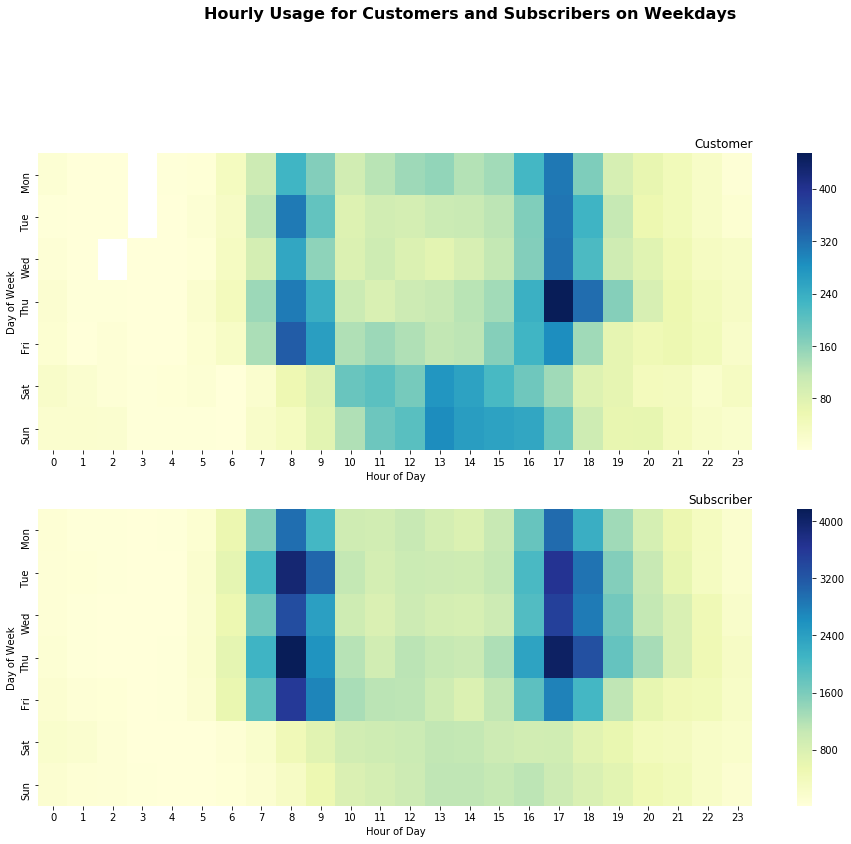

In [46]:
# set chat size and Axes to the current figure 
plt.figure(figsize = (16,12));
plt.subplot(2, 1, 1)
#set variables to be ploted 
customers = df_fgb_copy.query('user_type == "Customer"')
ct_counts = customers.groupby(['day', 'start_time_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='day', columns='start_time_hour', values='count')
#plot heat map of hourly rides of user type(customers) on weekdays
sb.heatmap(ct_counts, cmap='YlGnBu');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#chat title
plt.suptitle('Hourly Usage for Customers and Subscribers on Weekdays', y=1.05, fontsize=16, fontweight='bold');

# add Axes to the current figure
plt.subplot(2, 1, 2);
#set variables to be ploted 
subscribers = df_fgb_copy.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['day', 'start_time_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='day', columns='start_time_hour', values='count')
#plot heat map of hourly rides of user type(Subscriber) on weekdays
sb.heatmap(st_counts, cmap='YlGnBu');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');


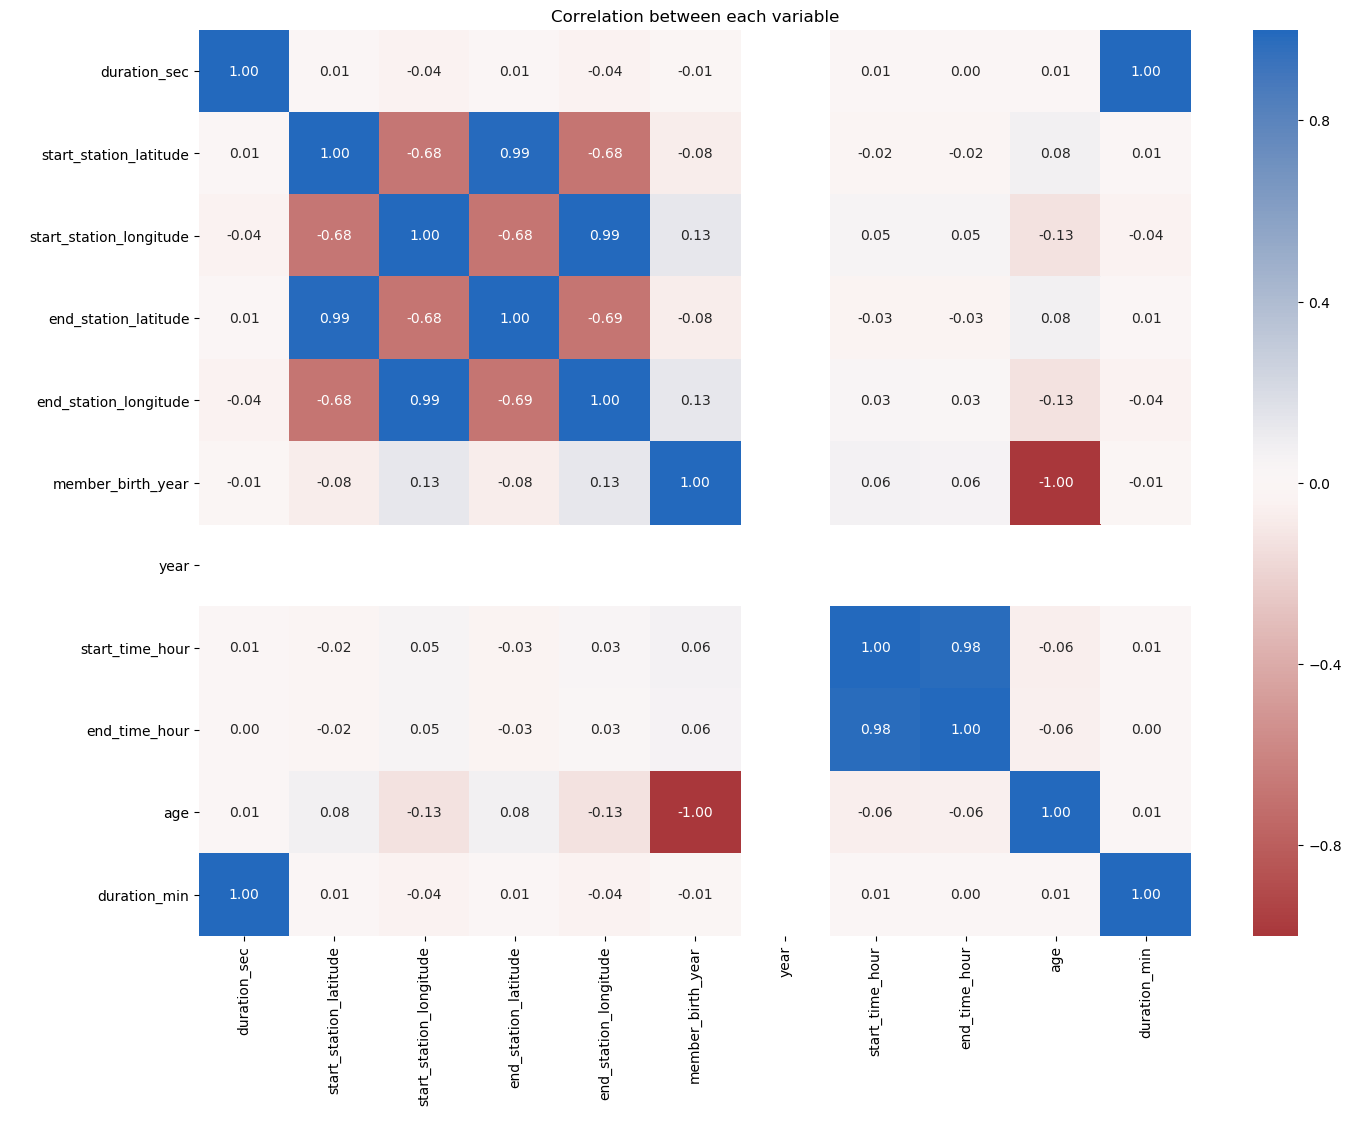

In [47]:
plt.figure(figsize = (16,12), dpi = 100)
#plot heat map of all each variables
sb.heatmap(df_fgb_copy.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
#setting the current tick locations and labels of the x-axis.
plt.xticks(rotation = 90)
#set chat legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
label(" "," ","Correlation between each variable");

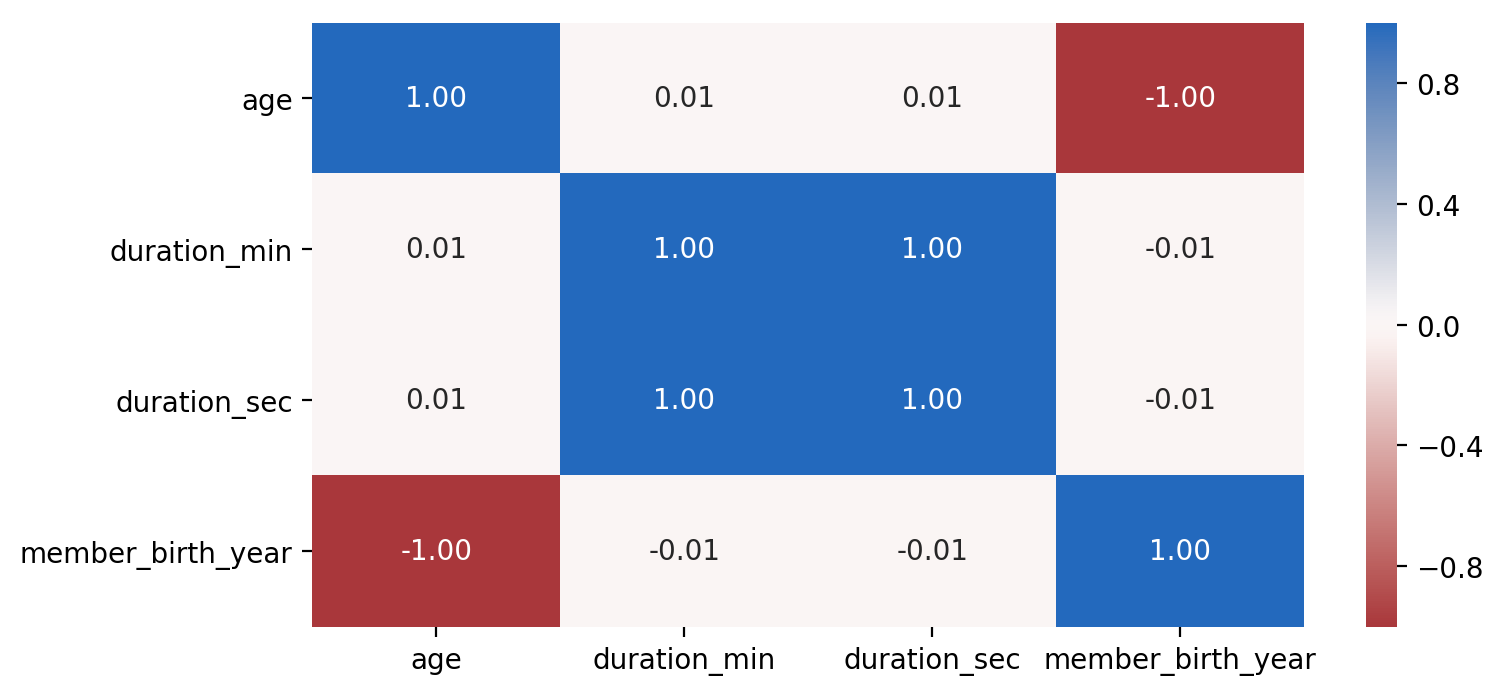

In [48]:
plt.figure(figsize = (8,4), dpi = 200)
#set array of variables on chat
data_stat = ['age', 'duration_min',"duration_sec", "member_birth_year", "bike_id"]
#plot heat map
sb.heatmap(df_fgb_copy[data_stat].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

>Actually, the heat map shows the aforementioned concepts as distinct percentages.

>No variable's relationship to time (duration in seconds or minutes) can be determined.

>The relationship between member birth year and age is inverse, which is typical.

>No significant correlation exists between any of the variables and the bike id.

## Multivariate Exploration

 **What is the difference in weekday trip length between customers and subscribers?**

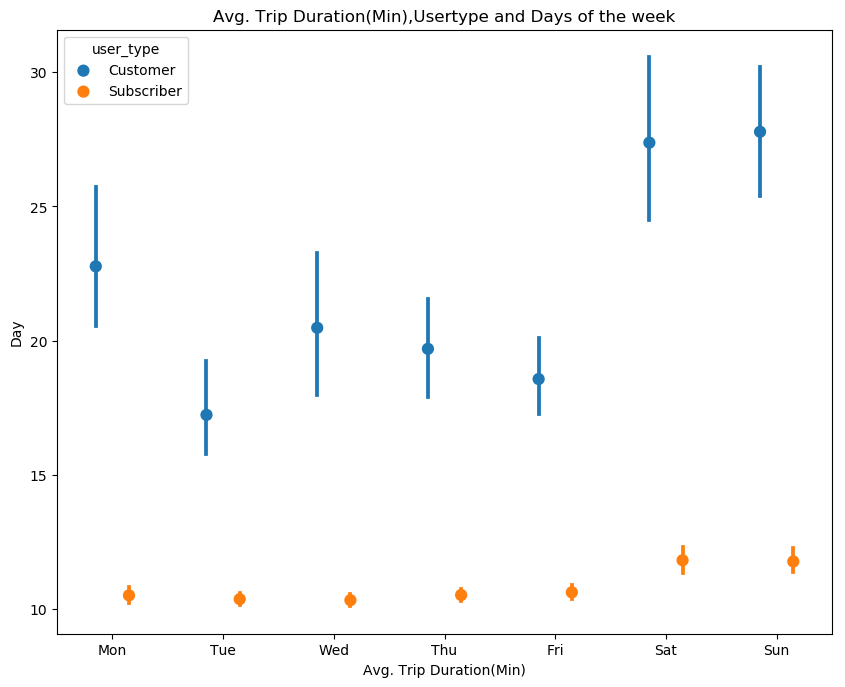

In [49]:
# set chat size and color
plt.figure(figsize = (10,8), dpi = 100)
#plot point plot of average trip, user type and days of the week
sb.pointplot(data=df_fgb_copy, x='day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
label("Avg. Trip Duration(Min)","Day","Avg. Trip Duration(Min),Usertype and Days of the week");

*The accompanying graphic shows that on each day of the week, subscribers take substantially shorter/quicker trips than non-subscribers.*

In [50]:
#data_stat = ['age', 'duration_min',"duration_sec", "member_birth_year", "bike_id"]
#g = sb.PairGrid(data =df_fgb_copy , vars = data_stat ) ;
#g.map(plt.scatter, alpha = 1/3);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> *a. No variable's relationship to time (seconds, minutes, or hours) is correlated.*

>*b. We can claim that the station location is a good factor and that we may explore it in my marketing campaign because there is a weak correlation between start station_id and start_station_longitude and end_station_longitude.*

>*c.The start_station_longitude and end_station_longitude show a high correlation, therefore we can assume that the station location is something I need to research for my marketing campaign.*
            

### Were there any interesting or surprising interactions between features?

> *No variable's relationship to time (seconds, minutes, or hours) is correlated.*

## Conclusions
>*Most users were Male.*

>*Most users were subscriber.*

>*The distribution of duration was strange as the minutes and the hour charts were 30 minutes or less for most users.*

>*The female distribution depending on their Age more than male.*

>*The customers use the bikes for longer periods than subscribers even though the subscribers are much highr in terms of numbers having the sunday and satuarday the most usage days which are the weekends.*


## Limitation



I encountered some difficulties while filling in the Age group column for the __subplot__.

Having trouble utilizing the fillna feature on some columns while cleaning.


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!



In [52]:
#save dataset
df_fgb_copy.to_csv('cleaned_df_fgb.csv',index=False)